# Clasificación de flores con Scikit-learn 🌸

Este proyecto utiliza el dataset *Iris*, un clásico en el mundo del machine learning, para entrenar distintos modelos de clasificación con la librería `Scikit-learn`.

Vamos a comparar modelos como:
- Regresión Logística
- K-Nearest Neighbors (KNN)
- Árbol de Decisión

Y evaluaremos su rendimiento usando precisión, matriz de confusión y visualizaciones.

---


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Convertir a DataFrame para facilitar el análisis
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Series(y).map(dict(enumerate(iris.target_names)))

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualización de datos

Usamos un `pairplot` para ver cómo se distribuyen las características de las flores según su especie.


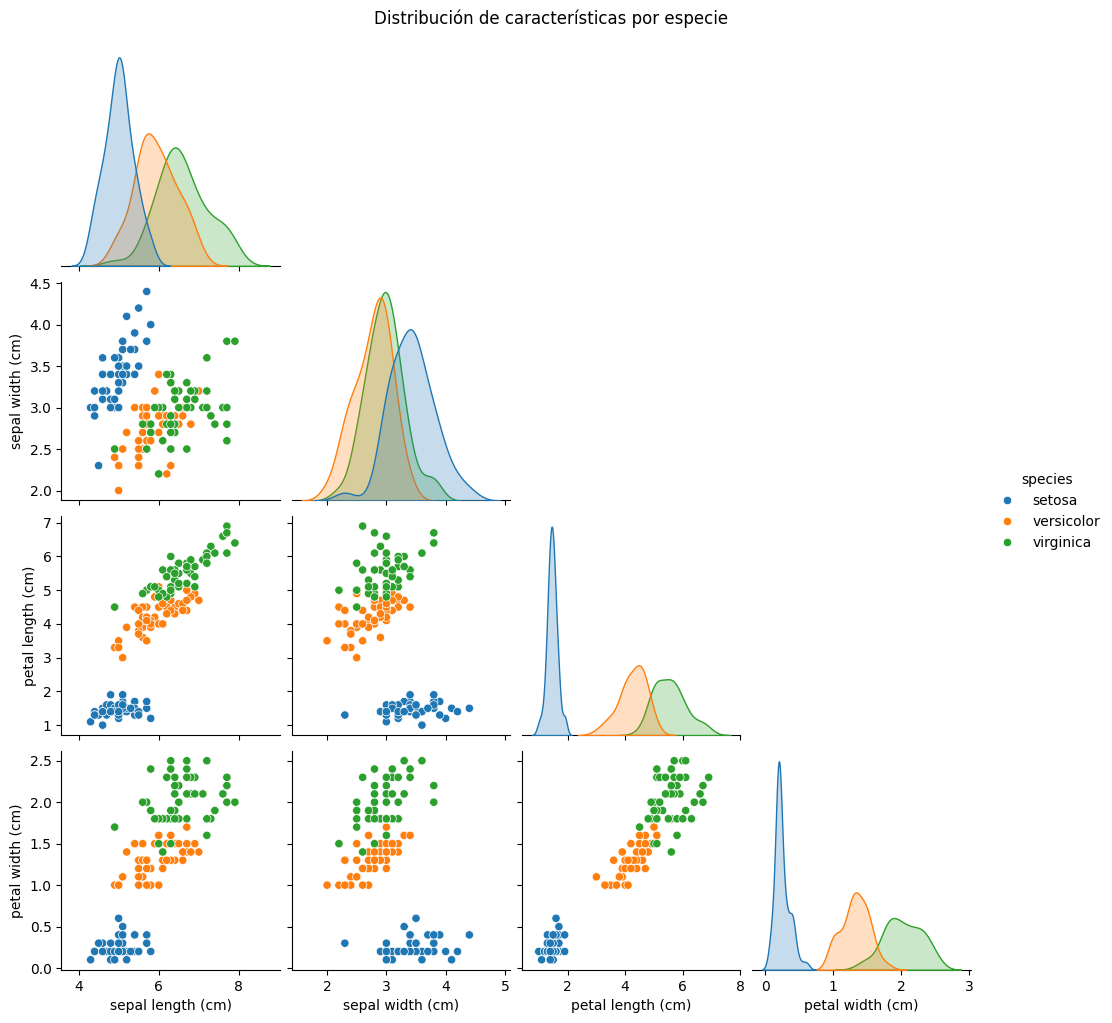

In [6]:
sns.pairplot(df, hue="species", corner=True)
plt.suptitle("Distribución de características por especie", y=1.02)
plt.show()


## Entrenamiento de modelos

A continuación se entrenan tres modelos:
- Regresión Logística
- K-Nearest Neighbors (KNN)
- Árbol de Decisión

Se escalan las variables, se dividen los datos en entrenamiento y prueba, y se evalúa el rendimiento de cada modelo.


In [4]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier()
}

# Entrenar y evaluar
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    acc = accuracy_score(y_test, predicciones)
    print(f"📌 Modelo: {nombre}")
    print("Precisión:", round(acc, 3))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, predicciones))
    print("Reporte de Clasificación:\n", classification_report(y_test, predicciones, target_names=iris.target_names))
    print("-" * 40)


📌 Modelo: Regresión Logística
Precisión: 1.0
Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------------------------------
📌 Modelo: KNN
Precisión: 1.0
Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weight

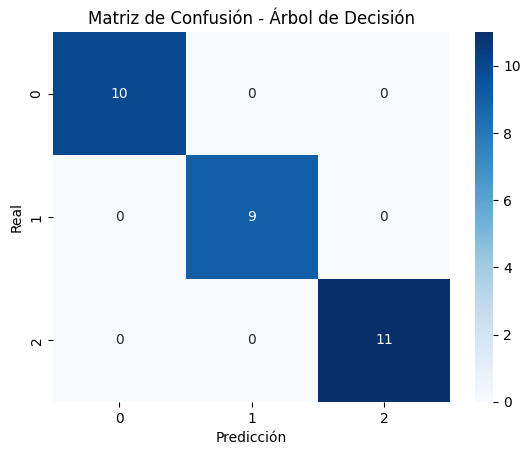

In [9]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predicciones)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matriz de Confusión - {nombre}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


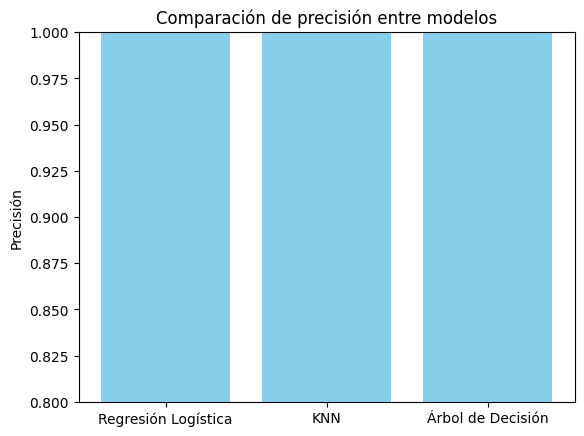

In [10]:
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    acc = accuracy_score(y_test, predicciones)
    resultados[nombre] = acc

# Mostrar comparación de modelos
plt.bar(resultados.keys(), resultados.values(), color="skyblue")
plt.title("Comparación de precisión entre modelos")
plt.ylabel("Precisión")
plt.ylim(0.8, 1.0)
plt.show()


## Conclusiones

- Todos los modelos tienen un buen desempeño, especialmente Regresión Logística y Árbol de Decisión.
- El dataset Iris es un buen ejemplo para practicar clasificación multiclase.
- Este notebook muestra cómo usar `scikit-learn` de forma práctica y visual.

🎉 ¡Gracias por leer!
